## Imports

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Constantes

In [65]:
YEARS = 1
PI = np.pi
DELTA = 1/365

S0 = 5
K = 3
SIGMA = 1

GAMMA = 1
D0 = 0

### Modelo Molino

In [66]:
# modelo del molino
# Si+1 = Si + κ(θ(ti) −Si)∆ + σ√∆ Zi (1)

In [67]:
def trend(dayi):
    return 6 +  2* np.cos(2 * PI * dayi / 365)

def nextDay(dayi,K,sigma):
    return dayi + K*(trend(dayi) - dayi) * DELTA + sigma * DELTA**0.5 * np.random.normal(0,1)


def simulateTrip():
    days = np.arange(0, 365 * YEARS, 1)
    shoks = np.random.normal(0, 1, len(days))
    trip = [S0]
    for i in days:
        trip.append(nextDay(trip[-1], K, SIGMA))
    return trip


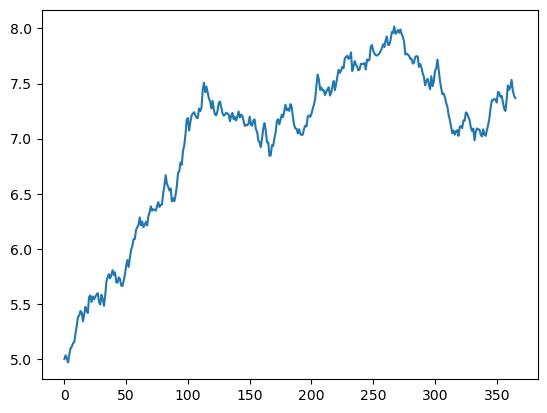

In [68]:
trip1 = np.array(simulateTrip())

plt.plot(trip1)

In [69]:
# Diferencia entre molinos


#Di+1 = Di −βDi∆ + γ√∆ Wi (2)

def diffNextDay(dayi, beta, gamma):
    return dayi - beta * dayi * DELTA + gamma * DELTA**0.5 * np.random.normal(0,1)

def simulateDiffTrip():
    days = np.arange(0, 365 * YEARS, 1)
    trip = [D0]
    for i in days:
        trip.append(diffNextDay(trip[-1], K, SIGMA))
    return trip

In [70]:
def simulateTripNorteSUr():
    days = np.arange(0, 365 * YEARS, 1)
    tripNorte = np.array(simulateTrip())
    diff = np.array(simulateDiffTrip())
    tripSur = tripNorte - diff
    
    return tripNorte, tripSur

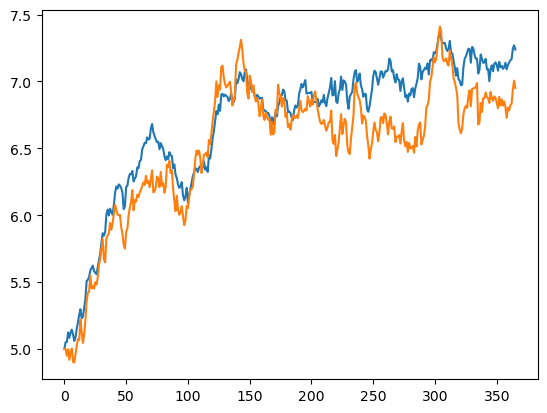

In [76]:
tripNorte, tripSur = simulateTripNorteSUr()

plt.plot(tripNorte)
plt.plot(tripSur)
plt.show()